# Q1. Gender Classification

Data: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

**Import Libraries**

In [ ]:
!pip install tensorflow

In [74]:
import os
import zipfile
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from IPython.display import clear_output as cls
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import GlobalAvgPool2D as GAP
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.models import Model
from keras.layers import  Input
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import plotly.express as px

**Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_dir = '/content/drive/MyDrive/Mid_1.zip'

zip_file = zipfile.ZipFile("/content/drive/MyDrive/Mid_1.zip")
zip_file.extractall()
zip_file.close()

In [ ]:
root_path =('./content/Training')
male_path = os.path.join('./content/Training/male')
female_path = os.path.join('./content/Training/female')

In [ ]:
datagen = ImageDataGenerator(rescale=1/255)

train_generator = datagen.flow_from_directory('/content/Training', target_size=(50, 50), batch_size=80, class_mode='binary')

Found 47009 images belonging to 2 classes.


**EDA**

In [7]:
root_path= '/content/Training'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(os.path.join(root_path, name))) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [8]:
root_path = '/content/Training'
male_path = os.path.join(root_path, 'male')
female_path = os.path.join(root_path, 'female')
male_images = [os.path.join(male_path, img) for img in os.listdir(male_path)]
female_images = [os.path.join(female_path, img) for img in os.listdir(female_path)]

In [ ]:
# male_images

In [11]:
# female_images

In [12]:
X = male_images + female_images
y = np.concatenate([np.zeros(len(male_images)), np.ones(len(female_images))])

In [13]:
X

['/content/Training/male/094213.jpg.jpg',
 '/content/Training/male/173888.jpg.jpg',
 '/content/Training/male/166297.jpg.jpg',
 '/content/Training/male/140100.jpg.jpg',
 '/content/Training/male/147706.jpg.jpg',
 '/content/Training/male/118461.jpg.jpg',
 '/content/Training/male/092287.jpg.jpg',
 '/content/Training/male/165773.jpg.jpg',
 '/content/Training/male/183416.jpg.jpg',
 '/content/Training/male/106763.jpg.jpg',
 '/content/Training/male/135457.jpg.jpg',
 '/content/Training/male/152480.jpg.jpg',
 '/content/Training/male/174760.jpg.jpg',
 '/content/Training/male/110951.jpg.jpg',
 '/content/Training/male/127437.jpg.jpg',
 '/content/Training/male/191029.jpg.jpg',
 '/content/Training/male/143198.jpg.jpg',
 '/content/Training/male/095293.jpg.jpg',
 '/content/Training/male/144013.jpg.jpg',
 '/content/Training/male/138370.jpg.jpg',
 '/content/Training/male/127202.jpg.jpg',
 '/content/Training/male/140551.jpg.jpg',
 '/content/Training/male/100669.jpg.jpg',
 '/content/Training/male/189702.jp

In [14]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [34]:
from PIL import Image

def plot_images(images, labels):
    plt.figure(figsize=(10, 5))

    for i in range(6):
        img = Image.open(images[i])
        num = int(i + 1)
        plt.subplot(2, 3, num)
        plt.imshow(img)
        if labels[i] == 0:
            plt.title('Male')
        else:
            plt.title('Female')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

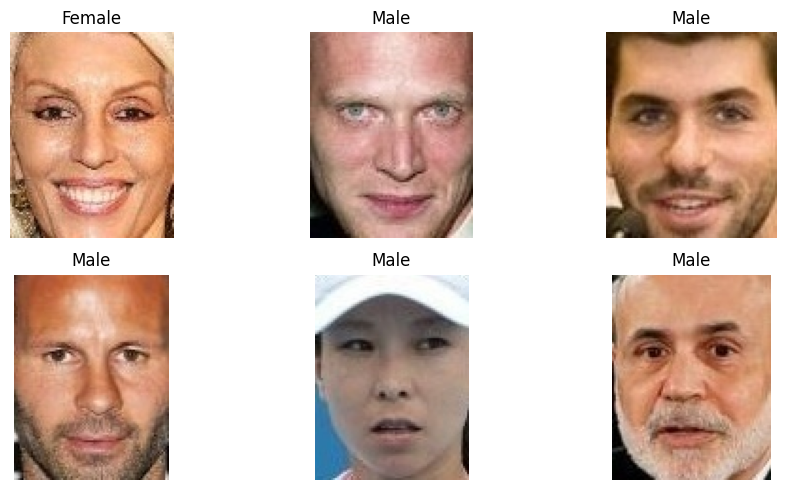

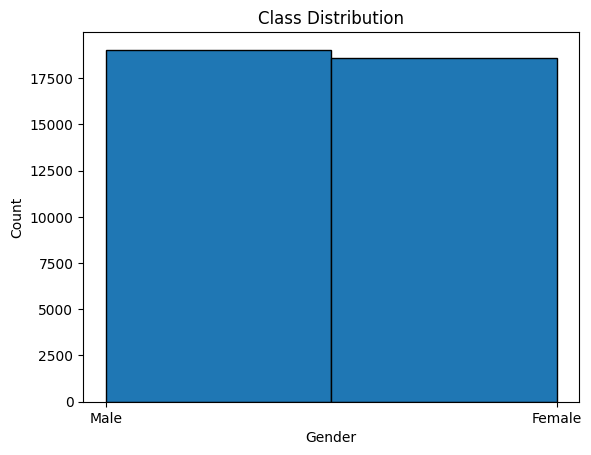

In [35]:
plot_images(X_train, y_train)

plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

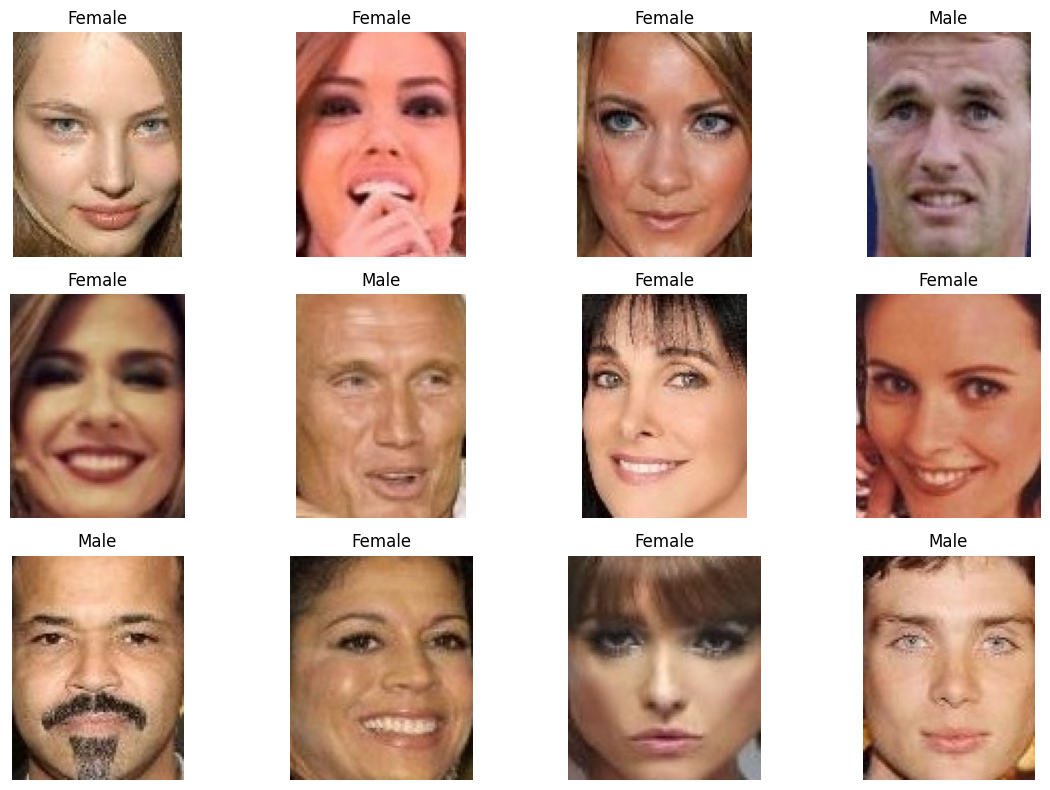

In [38]:
def plot_random_images(images, labels, num_rows=3, num_cols=4):
    plt.figure(figsize=(12, 8))
    num_images = num_rows * num_cols

    for i in range(num_images):
        random_index = random.randint(0, len(images) - 1)
        img = Image.open(images[random_index])
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title('Male' if labels[random_index] == 0 else 'Female')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_random_images(X_train, y_train)

**SVM**

In [56]:
svm_model = make_pipeline(CountVectorizer(), LinearSVC())
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

In [60]:
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 1.0


**CNN**

In [61]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [63]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    '/content/Training',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)

valid_generator = datagen.flow_from_directory(
    '/content/Validation',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [66]:
# This 100 epochs will take approx 3 hours to run

history = cnn_model.fit(train_generator, validation_data=valid_generator, epochs=100)

test_loss, test_accuracy = cnn_model.evaluate(valid_generator)
print("CNN Test Accuracy:", test_accuracy)

Epoch 1/100
735/735 [==============================] - 33s 45ms/step - loss: 0.1682 - accuracy: 0.9385 - val_loss: 0.1236 - val_accuracy: 0.9549
Epoch 2/100
735/735 [==============================] - 31s 43ms/step - loss: 0.1375 - accuracy: 0.9492 - val_loss: 0.1127 - val_accuracy: 0.9584
Epoch 3/100
735/735 [==============================] - 31s 43ms/step - loss: 0.1221 - accuracy: 0.9555 - val_loss: 0.1138 - val_accuracy: 0.9575
Epoch 4/100
735/735 [==============================] - 33s 44ms/step - loss: 0.1110 - accuracy: 0.9601 - val_loss: 0.1015 - val_accuracy: 0.9639
Epoch 5/100
735/735 [==============================] - 36s 50ms/step - loss: 0.1037 - accuracy: 0.9621 - val_loss: 0.1064 - val_accuracy: 0.9609
Epoch 6/100
735/735 [==============================] - 32s 43ms/step - loss: 0.0968 - accuracy: 0.9659 - val_loss: 0.1133 - val_accuracy: 0.9615
Epoch 7/100
735/735 [==============================] - 37s 51ms/step - loss: 0.0889 - accuracy: 0.9682 - val_loss: 0.1033 - val_ac

**CNN Accuracy: 0.9603**

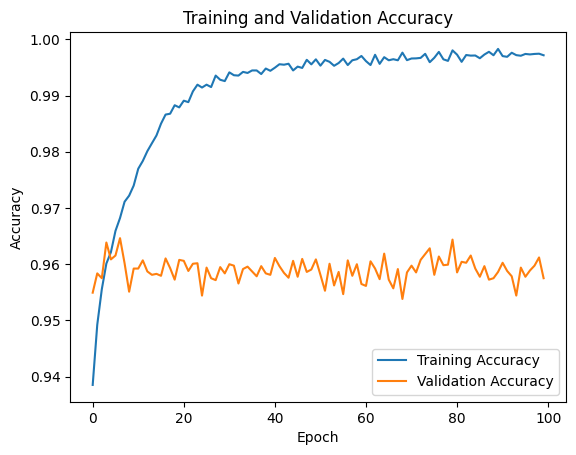

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

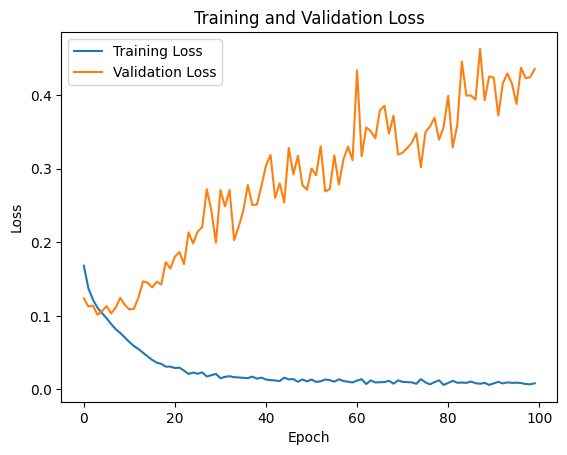

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Bad Results

In [70]:
valid_path = '/content/Validation'
class_names = sorted(os.listdir(valid_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(os.path.join(valid_path, name))) for name in class_names]
print(f"Total Classes: {n_classes}, Class Names: {class_names}")
print(f"Female: {class_dis[0]}, Male: {class_dis[1]}")

Total Classes: 2, Class Names: ['female', 'male']
Female: 5841, Male: 5808


In [72]:
import plotly.express as px

valid_path = '/content/Validation'
valid_dis = [len(os.listdir(os.path.join(valid_path, name))) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis, title="Test Class Distribution", hole=0.4)
fig.update_layout(title_x=0.48)
fig.show()

In [73]:
train_gen = ImageDataGenerator(rescale=1/255., rotation_range=10, horizontal_flip=True)
valid_ds = ImageDataGenerator(rescale=1/255)

train_ds = train_gen.flow_from_directory(root_path, class_mode='binary', target_size=(50, 50), shuffle=True, batch_size=80)
valid_ds = valid_ds.flow_from_directory(valid_path, class_mode='binary', target_size=(50, 50), shuffle=True, batch_size=80)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [75]:
inp = Input(shape=(50, 50, 3))

x = Conv2D(16, (3, 3), padding='same', activation='relu')(inp)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.3)(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.5)(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.4)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Flatten()(x)

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)

In [76]:
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=[out])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                         

In [78]:
# tf.test.gpu_device_name()

with tf.device('/device:GPU:0'):
    cbs = [EarlyStopping(patience=5, restore_best_weights=True),
           ModelCheckpoint(filepath="ModelCheckpoint.h5",
                           monitor="val_loss",
                           save_best_only=True)]
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.00)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(train_ds, validation_data=valid_ds,
                        callbacks=cbs, epochs=30)

Epoch 1/30
588/588 [==============================] - 139s 134ms/step - loss: 0.7101 - accuracy: 0.6914 - val_loss: 1.0667 - val_accuracy: 0.6274
Epoch 2/30
588/588 [==============================] - 83s 141ms/step - loss: 0.2438 - accuracy: 0.9064 - val_loss: 0.1583 - val_accuracy: 0.9421
Epoch 3/30
588/588 [==============================] - 79s 134ms/step - loss: 0.1974 - accuracy: 0.9262 - val_loss: 0.2246 - val_accuracy: 0.9296
Epoch 4/30
588/588 [==============================] - 79s 134ms/step - loss: 0.1757 - accuracy: 0.9355 - val_loss: 0.2199 - val_accuracy: 0.9198
Epoch 5/30
588/588 [==============================] - 74s 125ms/step - loss: 0.1617 - accuracy: 0.9407 - val_loss: 0.1346 - val_accuracy: 0.9507
Epoch 6/30
588/588 [==============================] - 74s 125ms/step - loss: 0.1522 - accuracy: 0.9444 - val_loss: 0.1237 - val_accuracy: 0.9578
Epoch 7/30
588/588 [==============================] - 77s 131ms/step - loss: 0.1471 - accuracy: 0.9475 - val_loss: 0.2191 - val_a

**Accuracy: 0.9604**

<Figure size 640x480 with 0 Axes>

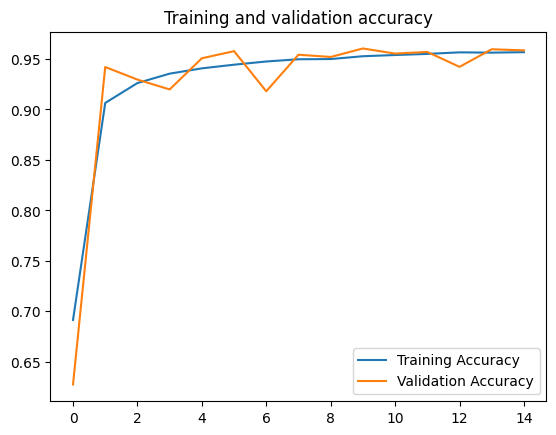

<Figure size 640x480 with 0 Axes>

In [82]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

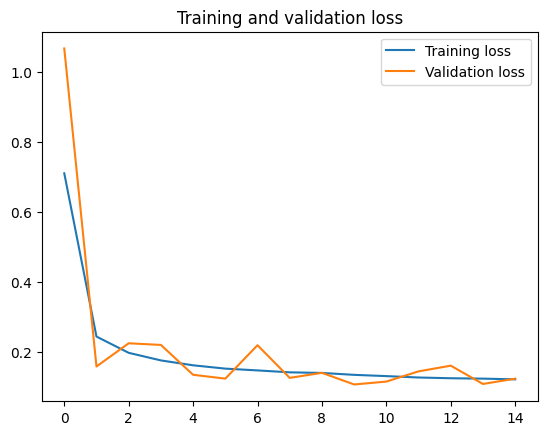

<Figure size 640x480 with 0 Axes>

In [80]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

Perfect !!!

# Q2. Cement Strength Regression

Data: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

**Load Data**

In [ ]:
df = pd.read_csv("concrete_data.csv")
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

**EDA**

<Axes: >

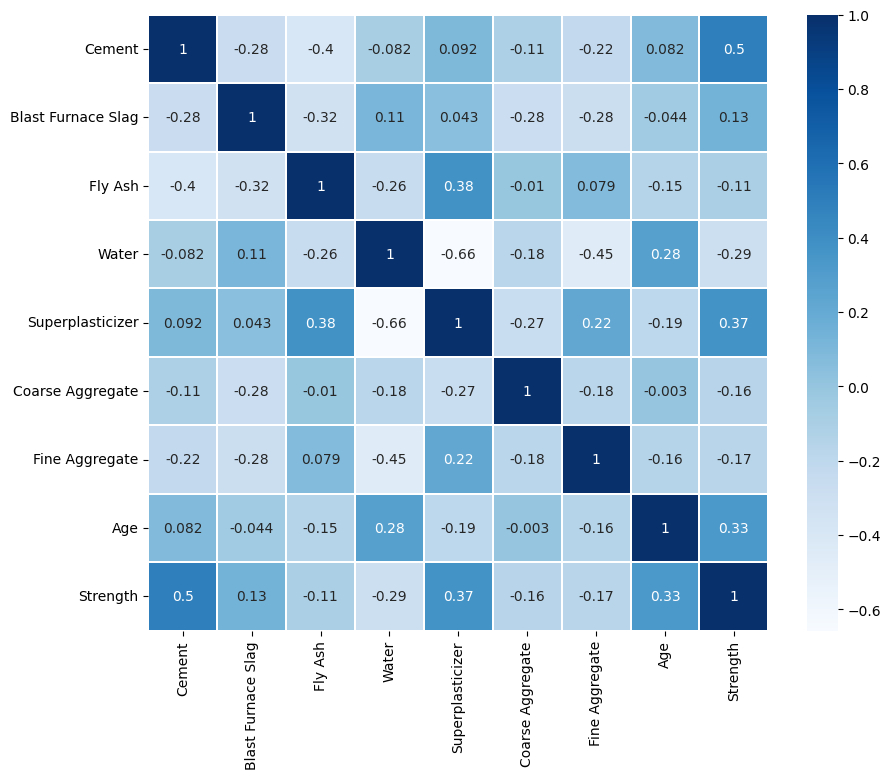

In [ ]:
colormap = plt.cm.Blues
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.2)

<Figure size 2000x2000 with 0 Axes>

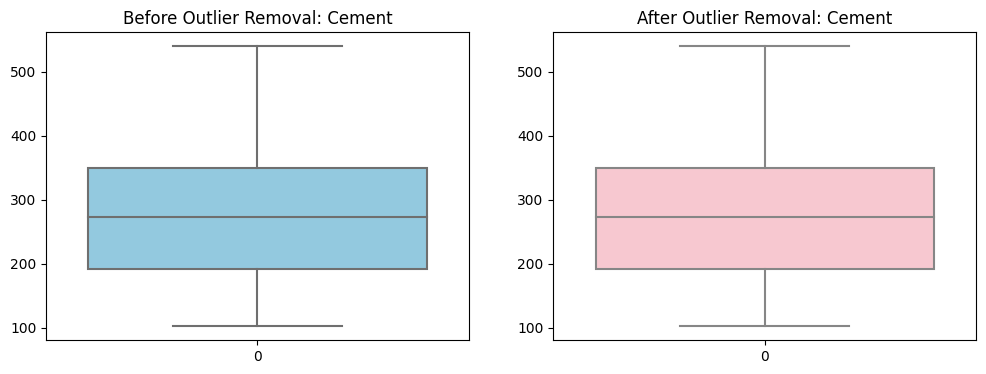

<Figure size 2000x2000 with 0 Axes>

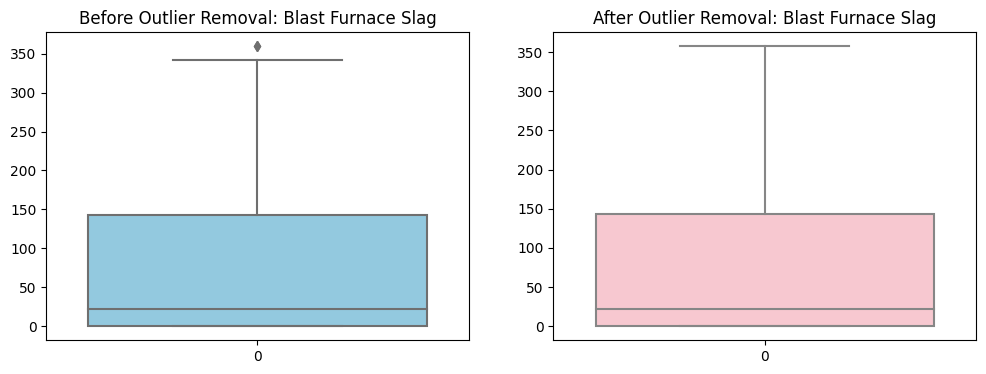

<Figure size 2000x2000 with 0 Axes>

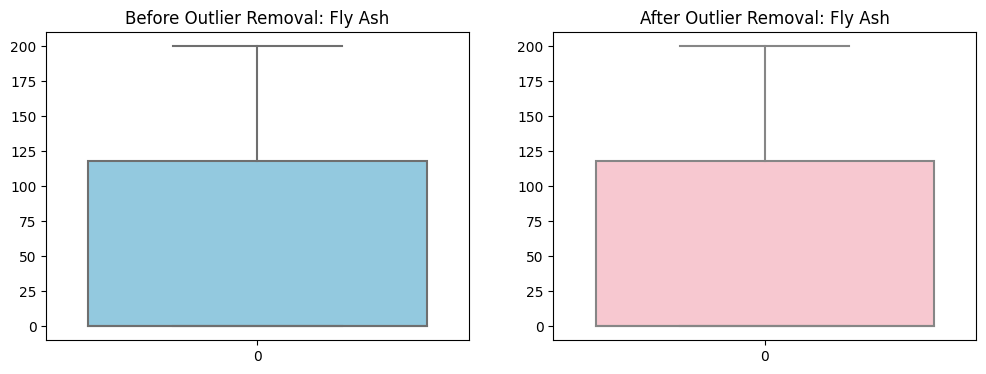

<Figure size 2000x2000 with 0 Axes>

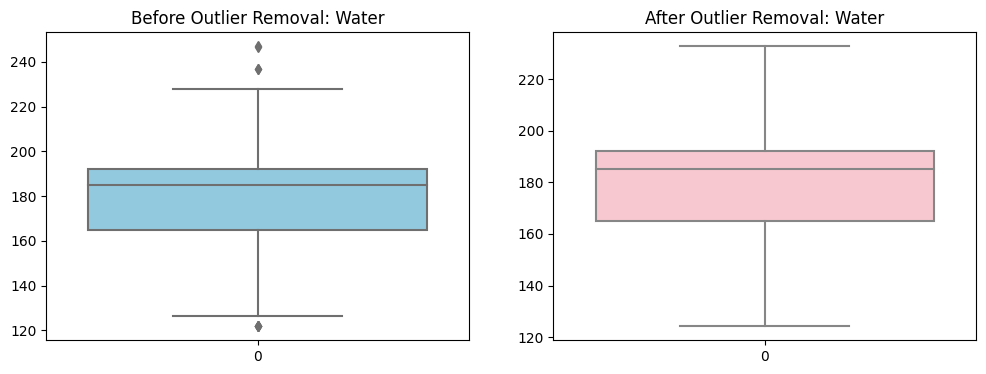

<Figure size 2000x2000 with 0 Axes>

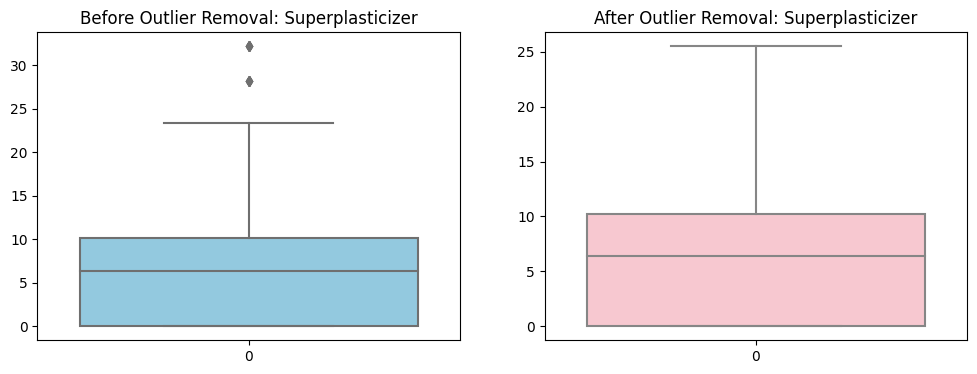

<Figure size 2000x2000 with 0 Axes>

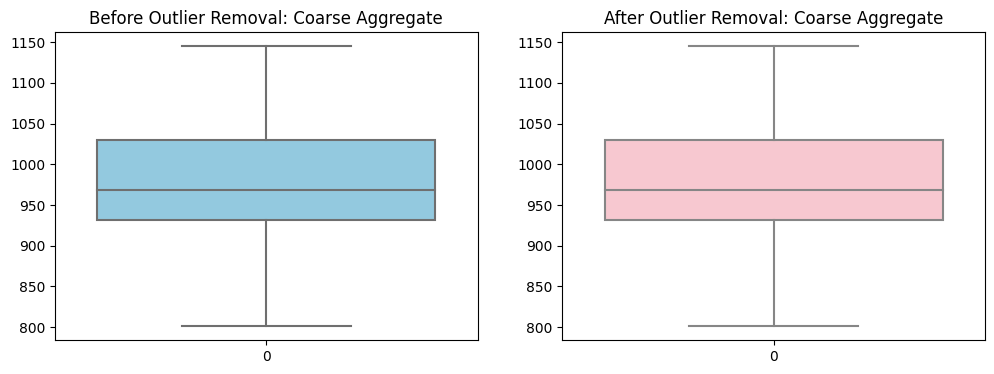

<Figure size 2000x2000 with 0 Axes>

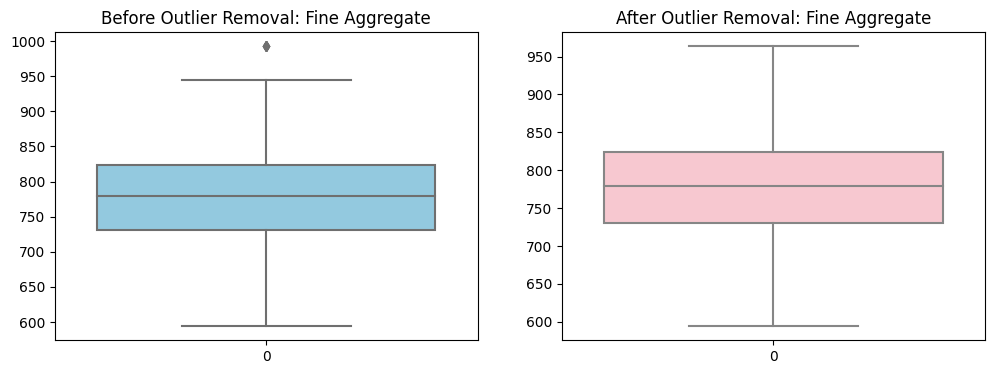

<Figure size 2000x2000 with 0 Axes>

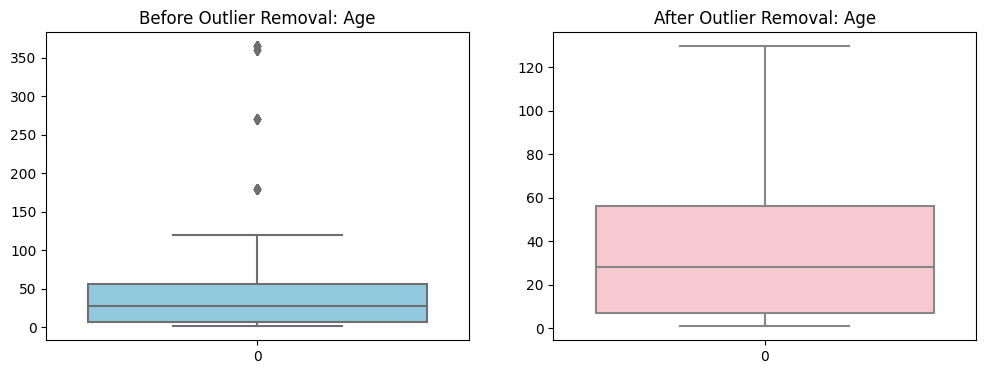

<Figure size 2000x2000 with 0 Axes>

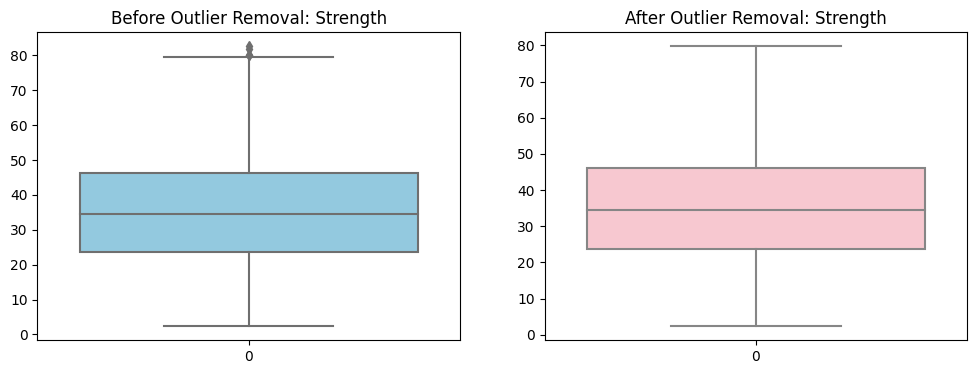

In [ ]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(df[col_name], ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(df[col_name], ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    print()
    plt.show()

    return df
for col in df.select_dtypes(exclude="object").columns[ : ]:
  df = remove_outlier(df,col)

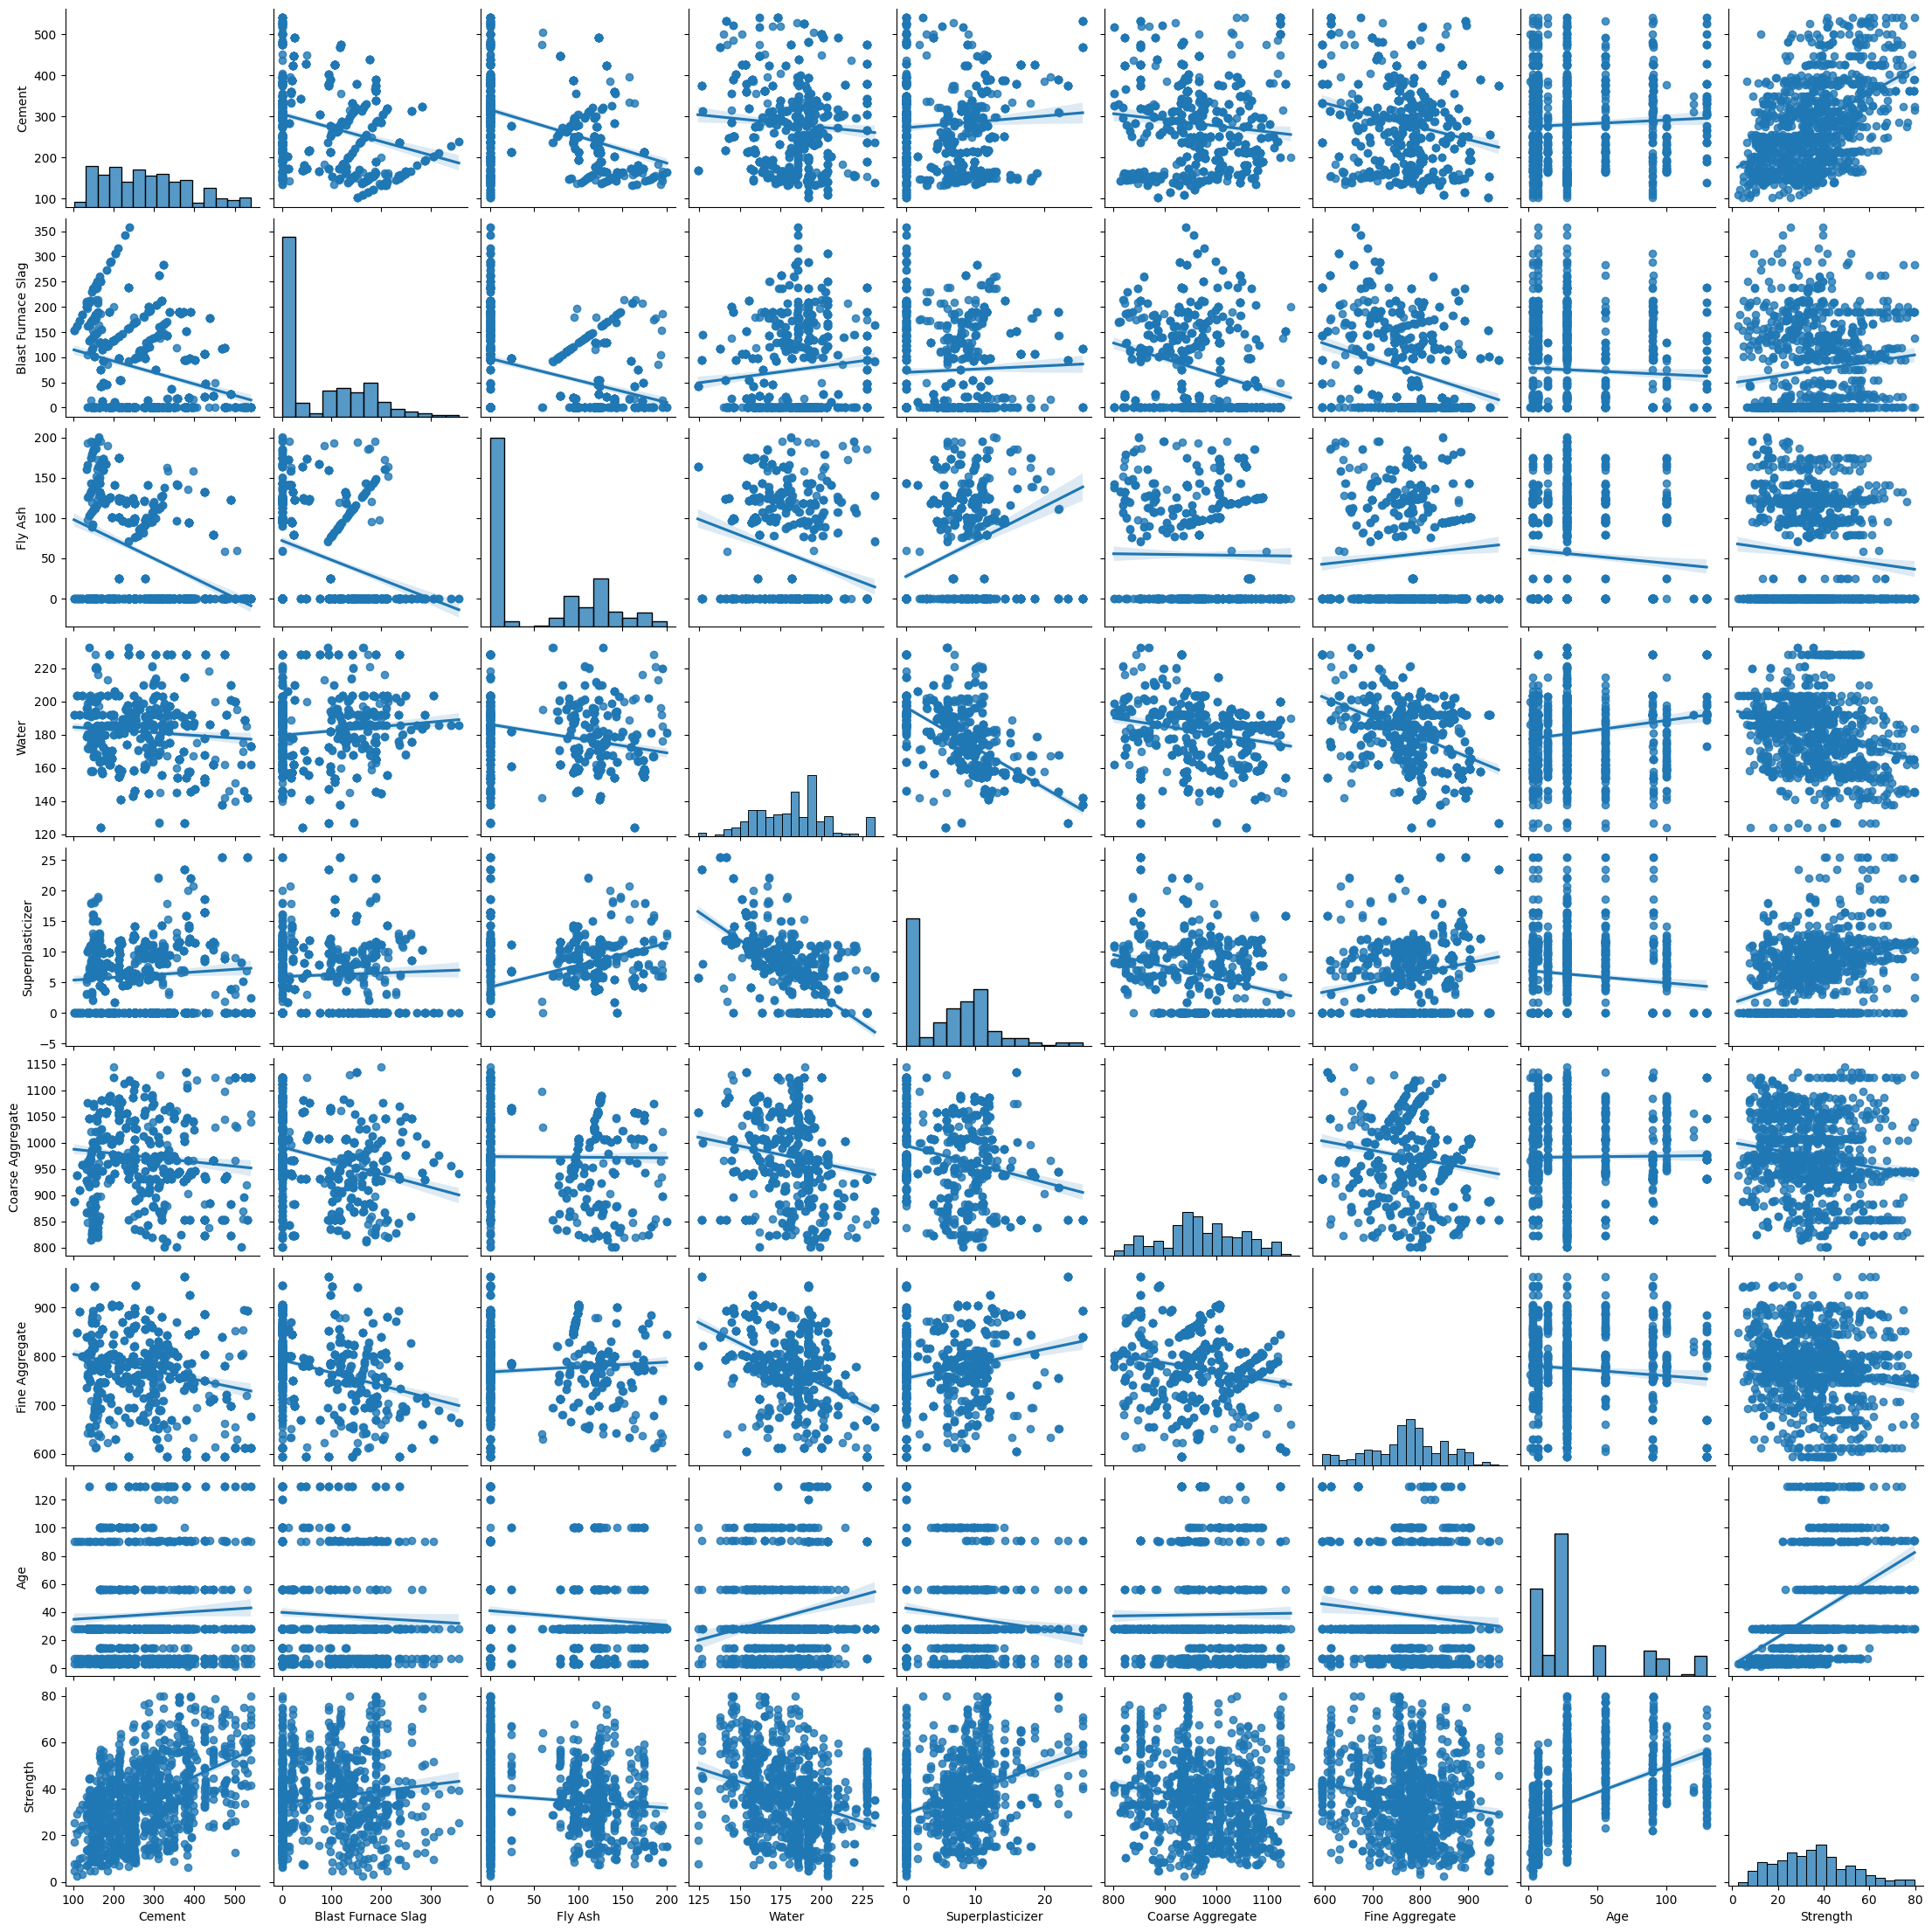

In [ ]:
fig = sns.pairplot(df, kind = "reg")

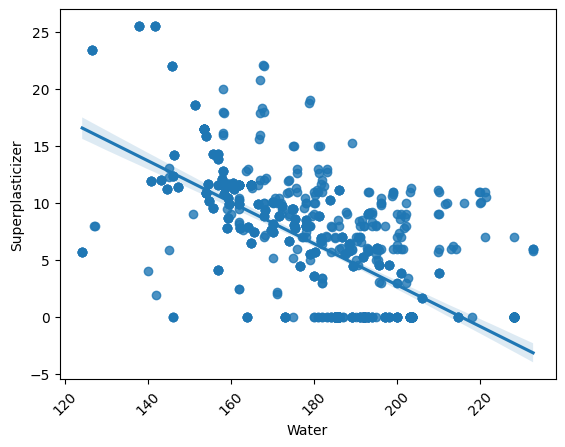

In [ ]:
sns.regplot(x="Water",y="Superplasticizer",data=df)
plt.xticks(rotation=45)
plt.show()

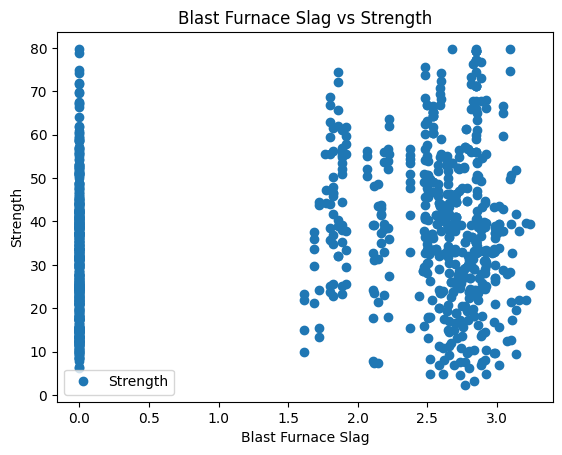

trans_BFS  Strength
trans_BFS    1.00000   0.21359
Strength     0.21359   1.00000

In [ ]:
df['trans_BFS'] = np.power(df['Blast Furnace Slag'],0.2)
df.plot(x='trans_BFS', y='Strength', style='o')
plt.title('Blast Furnace Slag vs Strength')
plt.xlabel('Blast Furnace Slag')
plt.ylabel('Strength')
plt.show()
df[['trans_BFS','Strength']].corr()

<Axes: xlabel='Cement', ylabel='Strength'>

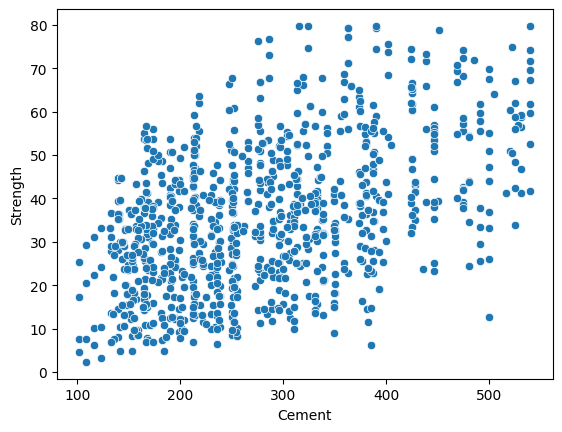

In [ ]:
import seaborn as sns

sns.scatterplot(x='Cement', y='Strength', data=df)

**Data Processing**

In [ ]:
X = df.drop(['Strength'],axis=1)
y = df['Strength']

In [ ]:
X

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate    Age  trans_BFS  
0               1040.0           676.0   28.0   0.000000  
1               1055.0           676.0   28.0   0.000000  
2                932.0           594.0  129.5   2.696267  
3                932.0           594.0  129.5   2.696267  
4                978.4           825.5  129.5   2.656915  
...                ...             ...    ...        ...  
1025             870.1           768.3   28.0   2.587567  
1026             817.9           813.4   28.0   0.000000  
1027             892.4           780.0   28.0   2.684433  
1028             989.6           788.9   28.0   2.845960  
1029             864.5           761.5   28.0   2.514393  

[1030 rows x 9 columns]

In [ ]:
y

0       79.7725
1       61.8900
2       40.2700
3       41.0500
4       44.3000
         ...   
1025    44.2800
1026    31.1800
1027    23.7000
1028    32.7700
1029    32.4000
Name: Strength, Length: 1030, dtype: float64

**Spliting Data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(824, 9)
(824,)
(206, 9)
(206,)


**LinearRegression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

lr_mae = mean_absolute_error(y_test,y_pred)
lr_mse = mean_squared_error(y_test,y_pred)
lr_smse = np.sqrt(mean_squared_error(y_test,y_pred))
lr_r2s  = r2_score(y_test,y_pred)

print("mean absolute error:",lr_mae)
print("mean squared error:",lr_mse)
print("root mean squared error:",lr_smse)
print("r2-score:",lr_r2s)

mean absolute error: 6.342209849399486
mean squared error: 64.95409489629796
root mean squared error: 8.059410331798349
r2-score: 0.7479242558522738


**Ridge**

In [ ]:
rid = Ridge()
rid.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred=rid.predict(X_test)

r_mae = mean_absolute_error(y_test,y_pred)
r_mse = mean_squared_error(y_test,y_pred)
r_smse = np.sqrt(mean_squared_error(y_test,y_pred))
r_rs  = r2_score(y_test,y_pred)

print("mean absolute error:",r_mae)
print("mean squared error:",r_mse)
print("root mean squared error:",r_smse)
print("r2-score:",r_rs)

mean absolute error: 6.342347029662477
mean squared error: 64.9557518860332
root mean squared error: 8.059513129589975
r2-score: 0.7479178253582268


**Lasso**

In [ ]:
las = Lasso()
las.fit(X_train,y_train)

Lasso()

In [ ]:
y_pred=las.predict(X_test)

l_mae = mean_absolute_error(y_test,y_pred)
l_mse = mean_squared_error(y_test,y_pred)
l_ns = np.sqrt(mean_squared_error(y_test,y_pred))
l_rs = r2_score(y_test,y_pred)

print("mean absolute error:",l_mae)
print("mean squared error:",l_mse)
print("root mean squared error:",l_ns)
print("r2-score:",l_rs)

mean absolute error: 6.404018386252893
mean squared error: 65.76102027411493
root mean squared error: 8.109316880854696
r2-score: 0.7447927163333312


**ANN**

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from geopy.format import units
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_neural_network():

    ann_model = Sequential([
    Dense(units = 128, kernel_initializer='normal', activation='relu'),
    Dense(units = 64, kernel_initializer='normal', activation='relu'),
    Dense(units = 32, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal')
  ])
    return ann_model

In [ ]:
ann_model = build_neural_network()
learning_rate = 0.01

ann_msle = MeanSquaredLogarithmicError()
ann_model.compile(
    loss = ann_msle,
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [ann_msle]
)

In [ ]:
# epochs

ann_model.compile(optimizer='adam', loss='mean_squared_error')
history=ann_model.fit(X_train, y_train, epochs=100)
ann_model.evaluate(X_test, y_test)

Epoch 1/100
26/26 [==============================] - 1s 3ms/step - loss: 24.9904
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 23.9440
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 22.7819
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 21.5070
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 22.0885
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 22.4816
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 21.7069
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 21.5061
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 21.4712
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 21.4396
Epoch 11/100
26/26 [==============================] - 0s 2ms/step - loss: 22.4115
Epoch 12/100
26/26 [==============================] - 0s 2ms/step - loss: 22.4140
Epoch 13/100
26/26 [=====

34.32978439331055

**Loss: loss: loss: 18.9721**